In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [19]:
# Load preprocessed data
x_input = np.load('prepared_data/x_input_combined.npy')
y_output = np.load('prepared_data/y_output_combined.npy')

y_output = to_categorical(y_output, num_classes=4)

In [20]:
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices()
print("Physical Devices:", physical_devices)

TensorFlow version: 2.16.1
Num GPUs Available:  0
Physical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [21]:
# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_input, y_output, test_size=0.2, random_state=42)


In [22]:
# Build the DenseNet model
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Display the summary of the model
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 8,091,204 (30.87 MB)

 Trainable params: 8,007,556 (30.55 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [23]:
# Optionally freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=20,
    validation_data=(x_val, y_val)
)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5652 - loss: 1.3971 - val_accuracy: 0.7786 - val_loss: 0.5311
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 959ms/step - accuracy: 0.8828 - loss: 0.3662 - val_accuracy: 0.7786 - val_loss: 0.5132
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 48s 993ms/step - accuracy: 0.9036 - loss: 0.2734 - val_accuracy: 0.8828 - val_loss: 0.3030
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 953ms/step - accuracy: 0.9364 - loss: 0.1946 - val_accuracy: 0.8932 - val_loss: 0.2663
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9643 - loss: 0.1455 - val_accuracy: 0.9271 - val_loss: 0.1986
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 968ms/step - accuracy: 0.9629 - loss: 0.1278 - val_accuracy: 0.8906 - val_loss: 0.2731
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9778 - loss: 0.0843 - val_accuracy: 0.9036 - val_loss: 0.2266
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 960ms/step - accuracy: 0.9843 - loss: 0.0730 - val_accuracy: 0.9

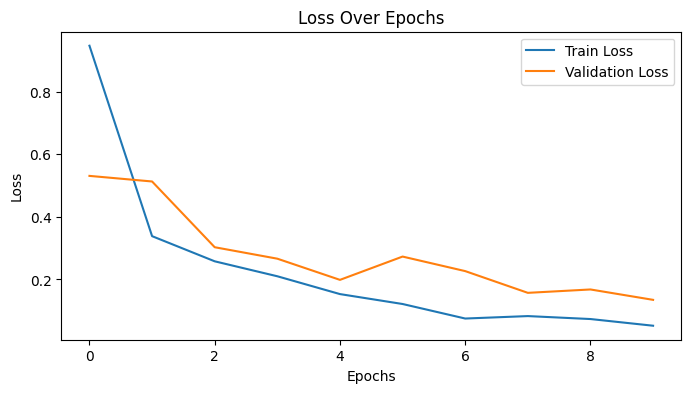

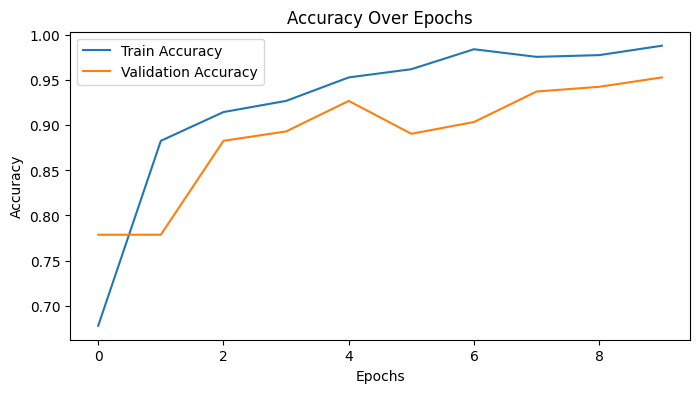

In [24]:
def plot_metrics(history):
    # Plot Loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_metrics(history)

12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 775ms/step


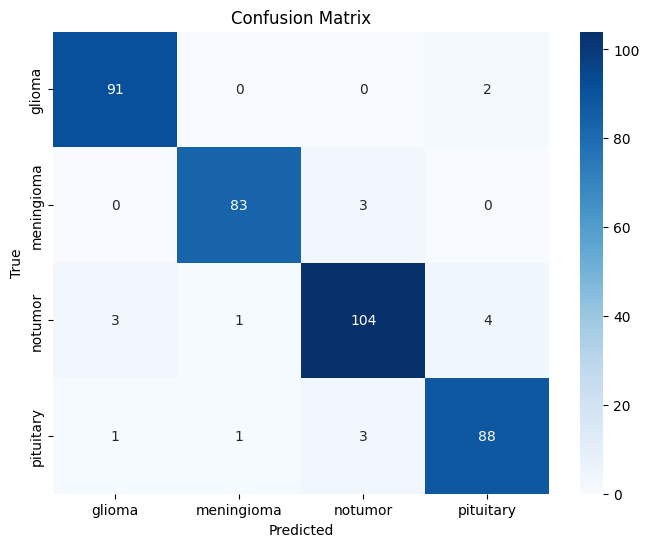

Accuracy: 0.953125
Precision: 0.9539975208244755
Recall: 0.9546047226092238
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.98      0.97      0.97        86
           2       0.95      0.93      0.94       112
           3       0.94      0.95      0.94        93

    accuracy                           0.95       384
   macro avg       0.95      0.95      0.95       384
weighted avg       0.95      0.95      0.95       384



In [25]:
# Make predictions
predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Evaluation metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Confusion Matrix and Classification Report

class_report = classification_report(true_classes, predicted_classes)
print("Classification Report:\n", class_report)